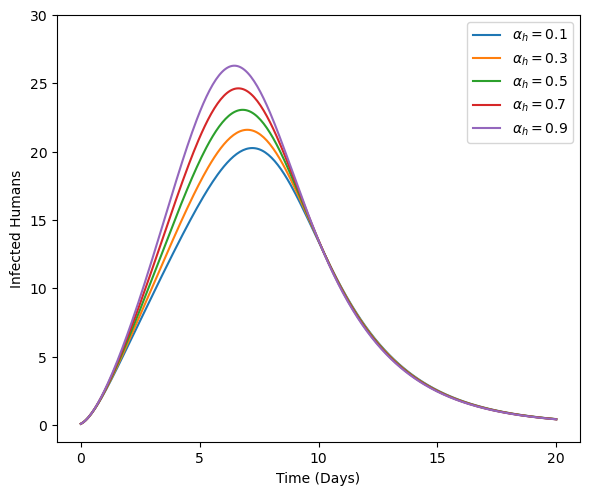

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the model
def human_modell(t, y, params):
    Sh, Vh, Eh, Ih, Rh, Sd, Vd, Ed, Id, Rd, Sw, Iw, Rw = y
    (
        theta_h, omega_h, mu_h, alpha_h, alpha_hd, alpha_hw, tau_h, sigma_h, delta_h, psi_h, gamma_h,
        theta_d, omega_d, mu_d, alpha_d, alpha_dw, tau_d, sigma_d, c_E, c_I, psi_d, gamma_d,
        theta_w, psi_w, sigma_w, mu_w, alpha_w
    ) = params 
    Nh = Sh + Vh + Eh + Ih + Rh 
    Nd = Sd + Vd + Ed + Id + Rd
    Nw = Sw + Iw + Rw

    phi1 = ((alpha_h * Ih) + (alpha_hd * Id) + (alpha_hw * Iw)) / Nh
    phi2 = ((alpha_d * Id) + (alpha_dw * Iw)) / Nd
    phi3 = alpha_w * Iw / Nw
    
    dSh_dt = theta_h - (omega_h + mu_h + phi1) * Sh + psi_h * Vh
    dVh_dt = omega_h * Sh - (1 - gamma_h) * phi1 * Vh - mu_h * Vh - psi_h * Vh
    dEh_dt = phi1 * Sh + (1 - gamma_h) * phi1 * Vh - (tau_h + mu_h) * Eh
    dIh_dt = tau_h * Eh - (sigma_h + mu_h + delta_h) * Ih
    dRh_dt = sigma_h * Ih - mu_h * Rh
    
    dSd_dt = theta_d - (omega_d + mu_d + phi2) * Sd + psi_d * Vd
    dVd_dt = omega_d * Sd - (1 - gamma_d) * phi2 * Vd - mu_d * Vd - psi_d * Vd
    dEd_dt = phi2 * Sd + (1 - gamma_d) * phi2 * Vd - (tau_d + mu_d + c_E) * Ed
    dId_dt = tau_d * Ed - (sigma_d + mu_d + c_I) * Id
    dRd_dt = sigma_d * Id - mu_d * Rd
    
    dSw_dt = theta_w - phi3 * Sw - mu_w * Sw + psi_w * Rw
    dIw_dt = phi3 * Sw - (sigma_w + mu_w) * Iw
    dRw_dt = sigma_w * Iw - (mu_w + psi_w) * Rw
    return [
        dSh_dt, dVh_dt, dEh_dt, dIh_dt, dRh_dt,
        dSd_dt, dVd_dt, dEd_dt, dId_dt, dRd_dt,
        dSw_dt, dIw_dt, dRw_dt
    ]

base_params = [
    0.47904262, 0.52667365, 0.29843227, None, 0.48363958, 0.58989004,           
    0.89636362, 0.003909, 0.04743887, 0.41485323, 0.5395067,                   
    0.10000007, 0.5, 0.09355426, 0.44140005, 0.51256543,                        
    0.45584532, 0.08131154, 0.04164164, 0.51946879, 0.4215323, 0.6045352,       
    0.52446098, 0.038, 0.058, 0.11671679, 0.43197723                           
]

y0 = [3.4e8, 0, 1e6, 1e5, 0, 1e10, 0, 1e7, 1e6, 0, 3e9, 1e7, 0]

# Simulate only 30 days, fewer evaluation points
t_span = (0, 20)
t_eval = np.linspace(0, 20, 300)  # 300 points instead of 1000

alpha_h_values = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(6, 5))

for alpha_h in alpha_h_values:
    params = base_params.copy()
    params[3] = alpha_h
    
    solution = solve_ivp(
        fun=lambda t, y: human_modell(t, y, params),
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        method='RK23',   # Faster, lower-order method is sufficient
        rtol=1e-5, atol=1e-8
    )
    
    Ih = 1e-6 * solution.y[3]  # scaled infections
    plt.plot(solution.t, Ih, label=f'$\\alpha_h = {alpha_h}$')

plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Infected Humans", fontsize=10)
plt.xticks(np.arange(0, 21, 5))  # force integer ticks: 0,5,10,15,20
plt.legend(fontsize=10)
plt.tight_layout()
plt.yticks(range(0, int(max(Ih)) + 5, 5))  # from 0 to max(y) with step 5
#plt.savefig('upd_alpha_h.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Plot varying the human transmission probability $\alpha_{h}$ without cross transmission

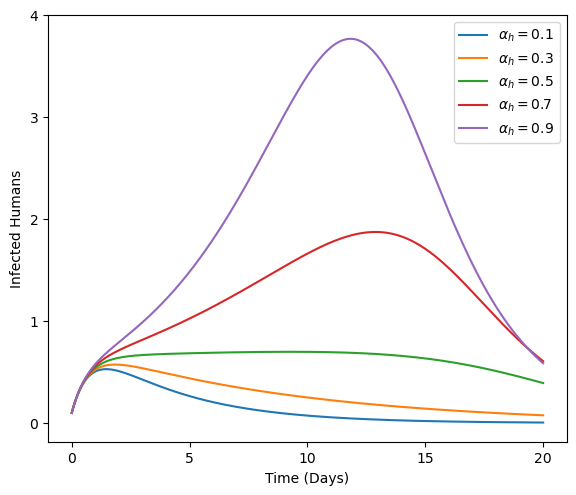

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



# Define the model
def human_modell(t, y, params):
    Sh, Vh, Eh, Ih, Rh, Sd, Vd, Ed, Id, Rd, Sw, Iw, Rw = y
    (
        theta_h, omega_h, mu_h, alpha_h, alpha_hd, alpha_hw, tau_h, sigma_h, delta_h, psi_h, gamma_h,
        theta_d, omega_d, mu_d, alpha_d, alpha_dw, tau_d, sigma_d, c_E, c_I, psi_d, gamma_d,
        theta_w, psi_w, sigma_w, mu_w, alpha_w
    ) = params 
    Nh = Sh + Vh + Eh + Ih + Rh 
    Nd = Sd + Vd + Ed + Id + Rd
    Nw = Sw + Iw + Rw

    phi1 = ((alpha_h * Ih) + (alpha_hd * Id) + (alpha_hw * Iw)) / Nh
    phi2 = ((alpha_d * Id) + (alpha_dw * Iw)) / Nd
    phi3 = alpha_w * Iw / Nw
    
    dSh_dt = theta_h - (omega_h + mu_h + phi1) * Sh + psi_h * Vh
    dVh_dt = omega_h * Sh - (1 - gamma_h) * phi1 * Vh - mu_h * Vh - psi_h * Vh
    dEh_dt = phi1 * Sh + (1 - gamma_h) * phi1 * Vh - (tau_h + mu_h) * Eh
    dIh_dt = tau_h * Eh - (sigma_h + mu_h + delta_h) * Ih
    dRh_dt = sigma_h * Ih - mu_h * Rh
    
    dSd_dt = theta_d - (omega_d + mu_d + phi2) * Sd + psi_d * Vd
    dVd_dt = omega_d * Sd - (1 - gamma_d) * phi2 * Vd - mu_d * Vd - psi_d * Vd
    dEd_dt = phi2 * Sd + (1 - gamma_d) * phi2 * Vd - (tau_d + mu_d + c_E) * Ed
    dId_dt = tau_d * Ed - (sigma_d + mu_d + c_I) * Id
    dRd_dt = sigma_d * Id - mu_d * Rd
    
    dSw_dt = theta_w - phi3 * Sw - mu_w * Sw + psi_w * Rw
    dIw_dt = phi3 * Sw - (sigma_w + mu_w) * Iw
    dRw_dt = sigma_w * Iw - (mu_w + psi_w) * Rw
    return [
        dSh_dt, dVh_dt, dEh_dt, dIh_dt, dRh_dt,
        dSd_dt, dVd_dt, dEd_dt, dId_dt, dRd_dt,
        dSw_dt, dIw_dt, dRw_dt
    ]


base_params = [
    0.47904262, 0.52667365, 0.29843227, None, 0, 0,           
    0.89636362, 0.003909, 0.04743887, 0.41485323, 0.05395067,                   
    0.10000007, 0.5, 0.09355426, 0.44140005, 0.51256543,                        
    0.45584532, 0.08131154, 0.04164164, 0.51946879, 0.4215323, 0.6045352,       
    0.52446098, 0.038, 0.058, 0.11671679, 0.43197723                           
]

y0 = [3.4e8, 0, 1e6, 1e5, 0, 1e10, 0, 1e7, 1e6, 0, 3e9, 1e7, 0]

# Simulate only 20 days, fewer evaluation points
t_span = (0, 20)
t_eval = np.linspace(0, 20, 300)  # 300 points instead of 1000

alpha_h_values = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(6, 5))

for alpha_h in alpha_h_values:
    params = base_params.copy()
    params[3] = alpha_h
    
    solution = solve_ivp(
        fun=lambda t, y: human_modell(t, y, params),
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        method='RK23',   # Faster, lower-order method is sufficient
        rtol=1e-5, atol=1e-8
    )
    
    Ih = 1e-6 * solution.y[3]  # scaled infections
    plt.plot(solution.t, Ih, label=f'$\\alpha_h = {alpha_h}$')

plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Infected Humans", fontsize=10)
plt.xticks(np.arange(0, 21, 5))  # force integer ticks: 0,5,10,15,20
plt.legend(fontsize=10)
plt.tight_layout()
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.yticks(range(0, int(max(Ih)) + 2, 1))  # from 0 to max(y) with step 5
#plt.savefig('upd_alpha_h_no.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Plot varying the human transmission probability $\alpha_{hd}$

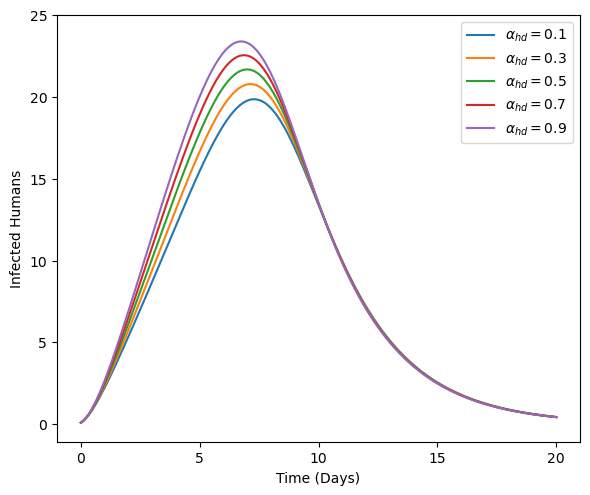

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the model
def human_modell(t, y, params):
    Sh, Vh, Eh, Ih, Rh, Sd, Vd, Ed, Id, Rd, Sw, Iw, Rw = y
    (
        theta_h, omega_h, mu_h, alpha_h, alpha_hd, alpha_hw, tau_h, sigma_h, delta_h, psi_h, gamma_h,
        theta_d, omega_d, mu_d, alpha_d, alpha_dw, tau_d, sigma_d, c_E, c_I, psi_d, gamma_d,
        theta_w, psi_w, sigma_w, mu_w, alpha_w
    ) = params 
    Nh = Sh + Vh + Eh + Ih + Rh 
    Nd = Sd + Vd + Ed + Id + Rd
    Nw = Sw + Iw + Rw

    phi1 = ((alpha_h * Ih) + (alpha_hd * Id) + (alpha_hw * Iw)) / Nh
    phi2 = ((alpha_d * Id) + (alpha_dw * Iw)) / Nd
    phi3 = alpha_w * Iw / Nw
    
    dSh_dt = theta_h - (omega_h + mu_h + phi1) * Sh + psi_h * Vh
    dVh_dt = omega_h * Sh - (1 - gamma_h) * phi1 * Vh - mu_h * Vh - psi_h * Vh
    dEh_dt = phi1 * Sh + (1 - gamma_h) * phi1 * Vh - (tau_h + mu_h) * Eh
    dIh_dt = tau_h * Eh - (sigma_h + mu_h + delta_h) * Ih
    dRh_dt = sigma_h * Ih - mu_h * Rh
    
    dSd_dt = theta_d - (omega_d + mu_d + phi2) * Sd + psi_d * Vd
    dVd_dt = omega_d * Sd - (1 - gamma_d) * phi2 * Vd - mu_d * Vd - psi_d * Vd
    dEd_dt = phi2 * Sd + (1 - gamma_d) * phi2 * Vd - (tau_d + mu_d + c_E) * Ed
    dId_dt = tau_d * Ed - (sigma_d + mu_d + c_I) * Id
    dRd_dt = sigma_d * Id - mu_d * Rd
    
    dSw_dt = theta_w - phi3 * Sw - mu_w * Sw + psi_w * Rw
    dIw_dt = phi3 * Sw - (sigma_w + mu_w) * Iw
    dRw_dt = sigma_w * Iw - (mu_w + psi_w) * Rw
    return [
        dSh_dt, dVh_dt, dEh_dt, dIh_dt, dRh_dt,
        dSd_dt, dVd_dt, dEd_dt, dId_dt, dRd_dt,
        dSw_dt, dIw_dt, dRw_dt
    ]


base_params = [
    0.47904262, 0.52667365, 0.29843227, 0.3, None, 0.58989004,           
    0.89636362, 0.003909, 0.04743887, 0.41485323, 0.5395067,                   
    0.10000007, 0.5, 0.09355426, 0.44140005, 0.51256543,                        
    0.45584532, 0.08131154, 0.04164164, 0.51946879, 0.4215323, 0.6045352,       
    0.52446098, 0.038, 0.058, 0.11671679, 0.43197723                           
]

y0 = [3.4e8, 0, 1e6, 1e5, 0, 1e10, 0, 1e7, 1e6, 0, 3e9, 1e7, 0]

# Simulate only 20 days, fewer evaluation points
t_span = (0, 20)
t_eval = np.linspace(0, 20, 300)  # 300 points instead of 1000

alpha_hd_values = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(6, 5))

for alpha_hd in alpha_hd_values:
    params = base_params.copy()
    params[4] = alpha_hd
    
    solution = solve_ivp(
        fun=lambda t, y: human_modell(t, y, params),
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        method='RK23',   # Faster, lower-order method is sufficient
        rtol=1e-5, atol=1e-8
    )
    
    Ih = 1e-6 * solution.y[3]  # scaled infections
    #Ih = solution.y[3]* (1000 / np.sum(solution.y[3]))  # scaled infections
    plt.plot(solution.t, Ih, label=f'$\\alpha_{{hd}} = {alpha_hd}$')

plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Infected Humans", fontsize=10)
plt.xticks(np.arange(0, 21, 5))  # force integer ticks: 0,5,10,15,20
plt.legend(fontsize=10)
plt.tight_layout()
plt.yticks(range(0, int(max(Ih)) + 5, 5))  # from 0 to max(y) with step 5
#plt.savefig('upd_alpha_hd.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Plot varying the human transmission probability $\alpha_{hw}$

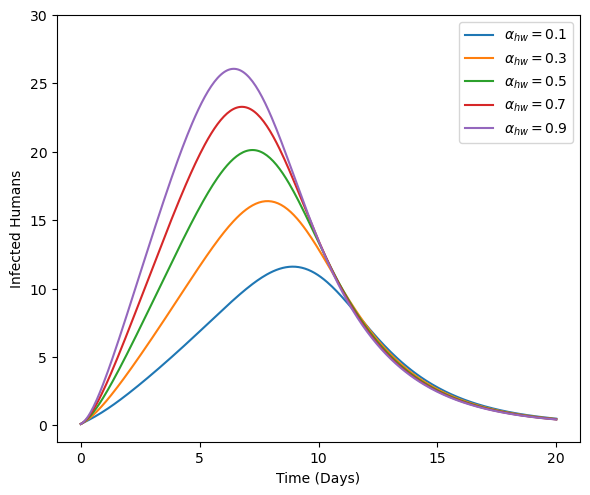

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the model
def human_modell(t, y, params):
    Sh, Vh, Eh, Ih, Rh, Sd, Vd, Ed, Id, Rd, Sw, Iw, Rw = y
    (
        theta_h, omega_h, mu_h, alpha_h, alpha_hd, alpha_hw, tau_h, sigma_h, delta_h, psi_h, gamma_h,
        theta_d, omega_d, mu_d, alpha_d, alpha_dw, tau_d, sigma_d, c_E, c_I, psi_d, gamma_d,
        theta_w, psi_w, sigma_w, mu_w, alpha_w
    ) = params 
    Nh = Sh + Vh + Eh + Ih + Rh 
    Nd = Sd + Vd + Ed + Id + Rd
    Nw = Sw + Iw + Rw

    phi1 = ((alpha_h * Ih) + (alpha_hd * Id) + (alpha_hw * Iw)) / Nh
    phi2 = ((alpha_d * Id) + (alpha_dw * Iw)) / Nd
    phi3 = alpha_w * Iw / Nw
    
    dSh_dt = theta_h - (omega_h + mu_h + phi1) * Sh + psi_h * Vh
    dVh_dt = omega_h * Sh - (1 - gamma_h) * phi1 * Vh - mu_h * Vh - psi_h * Vh
    dEh_dt = phi1 * Sh + (1 - gamma_h) * phi1 * Vh - (tau_h + mu_h) * Eh
    dIh_dt = tau_h * Eh - (sigma_h + mu_h + delta_h) * Ih
    dRh_dt = sigma_h * Ih - mu_h * Rh
    
    dSd_dt = theta_d - (omega_d + mu_d + phi2) * Sd + psi_d * Vd
    dVd_dt = omega_d * Sd - (1 - gamma_d) * phi2 * Vd - mu_d * Vd - psi_d * Vd
    dEd_dt = phi2 * Sd + (1 - gamma_d) * phi2 * Vd - (tau_d + mu_d + c_E) * Ed
    dId_dt = tau_d * Ed - (sigma_d + mu_d + c_I) * Id
    dRd_dt = sigma_d * Id - mu_d * Rd
    
    dSw_dt = theta_w - phi3 * Sw - mu_w * Sw + psi_w * Rw
    dIw_dt = phi3 * Sw - (sigma_w + mu_w) * Iw
    dRw_dt = sigma_w * Iw - (mu_w + psi_w) * Rw
    return [
        dSh_dt, dVh_dt, dEh_dt, dIh_dt, dRh_dt,
        dSd_dt, dVd_dt, dEd_dt, dId_dt, dRd_dt,
        dSw_dt, dIw_dt, dRw_dt
    ]

base_params = [
    0.47904262, 0.52667365, 0.29843227, 0.3, 0.48363958, None,           
    0.89636362, 0.003909, 0.04743887, 0.41485323, 0.5395067,                   
    0.10000007, 0.5, 0.09355426, 0.44140005, 0.51256543,                        
    0.45584532, 0.08131154, 0.04164164, 0.51946879, 0.4215323, 0.6045352,       
    0.52446098, 0.038, 0.058, 0.11671679, 0.43197723                           
]

y0 = [3.4e8, 0, 1e6, 1e5, 0, 1e10, 0, 1e7, 1e6, 0, 3e9, 1e7, 0]

# Simulate only 20 days, fewer evaluation points
t_span = (0, 20)
t_eval = np.linspace(0, 20, 300)  # 300 points instead of 1000

alpha_hw_values = [0.1, 0.3, 0.5, 0.7, 0.9]

plt.figure(figsize=(6, 5))

for alpha_hw in alpha_hw_values:
    params = base_params.copy()
    params[5] = alpha_hw
    
    solution = solve_ivp(
        fun=lambda t, y: human_modell(t, y, params),
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        method='RK23',   # Faster, lower-order method is sufficient
        rtol=1e-5, atol=1e-8
    )
    
    Ih = 1e-6 * solution.y[3]  # scaled infections
    #Ih = solution.y[3]* (1000 / np.sum(solution.y[3]))  # scaled infections
    plt.plot(solution.t, Ih, label=f'$\\alpha_{{hw}} = {alpha_hw}$')

plt.xlabel("Time (Days)", fontsize=10)
plt.ylabel("Infected Humans", fontsize=10)
plt.xticks(np.arange(0, 21, 5))  # force integer ticks: 0,5,10,15,20
plt.legend(fontsize=10)
plt.tight_layout()
plt.yticks(range(0, int(max(Ih)) + 5, 5))  # from 0 to max(y) with step 5
#plt.savefig('upd_alpha_hw.png', dpi=300, bbox_inches='tight')
plt.show()


### CONTROL


Normalized AUC and Peak values (relative to no control = 1.0):
          Peak_Ih (rel)  AUC_Ih (rel)  Peak_Id (rel)  AUC_Id (rel)
scenario                                                          
none              1.000         1.000          1.000         1.000
u1                0.508         0.575          0.627         0.661
u1+u2             0.483         0.551          0.578         0.611
u1+u2+u3          0.471         0.534          0.578         0.611
u1+u2+u4          0.459         0.524          0.100         0.099
u1+u3             0.495         0.557          0.627         0.661
u1+u4             0.480         0.545          0.107         0.107
u2                0.946         0.959          0.921         0.935
u2+u3             0.924         0.928          0.921         0.935
u2+u4             0.876         0.902          0.153         0.151
u3                0.976         0.968          1.000         1.000
u4                0.921         0.939          0.165         0.16

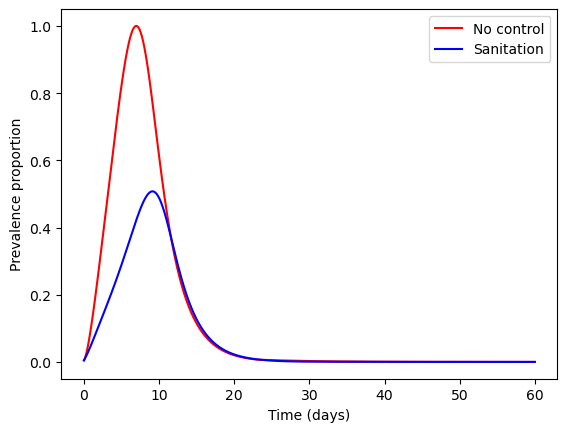

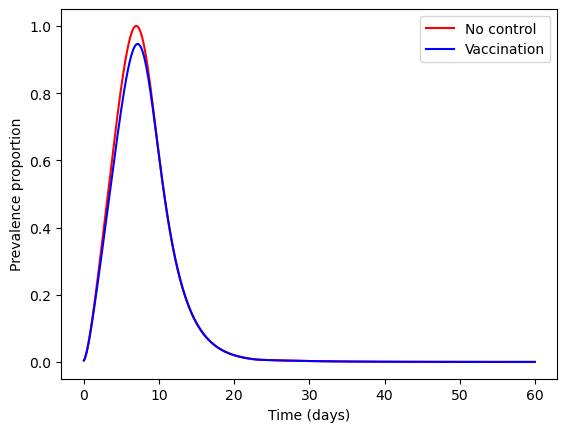

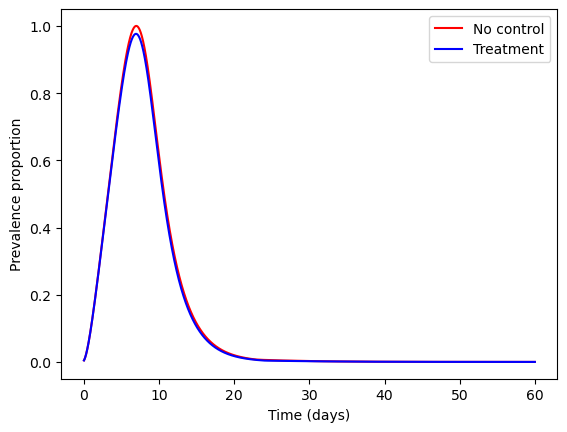

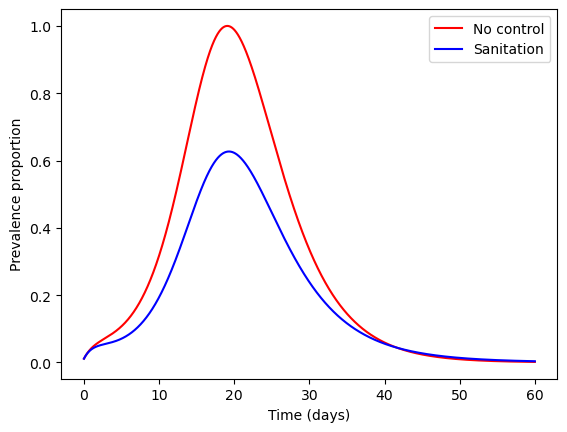

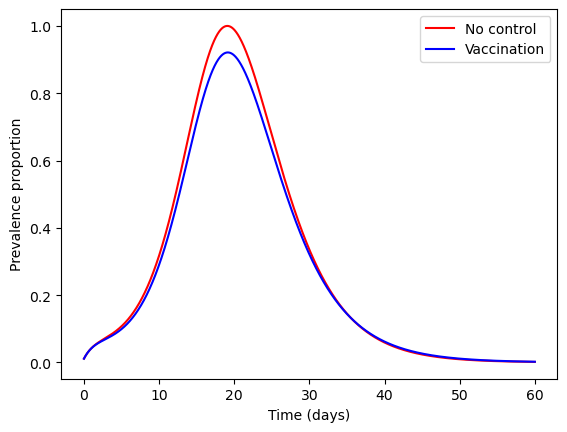

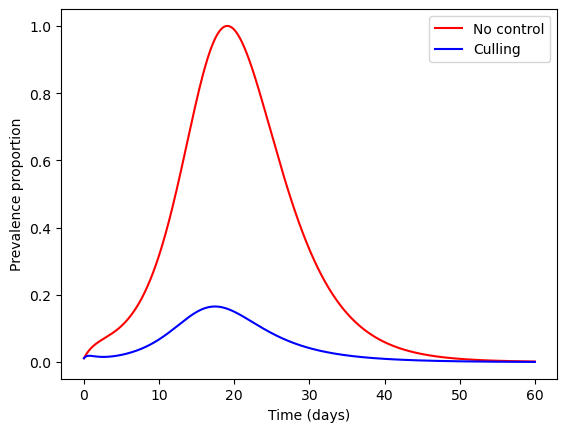

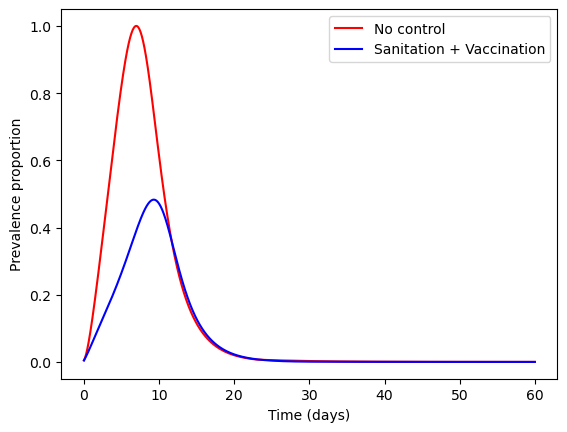

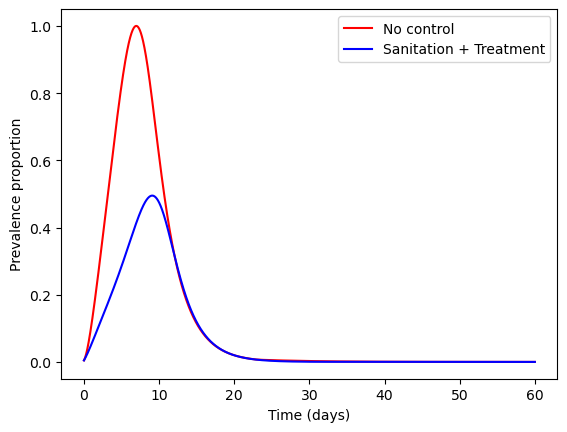

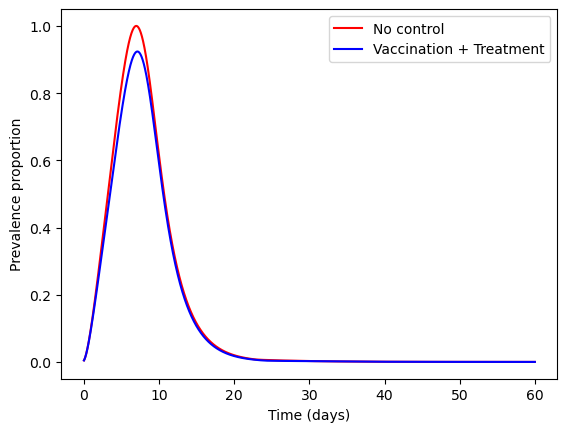

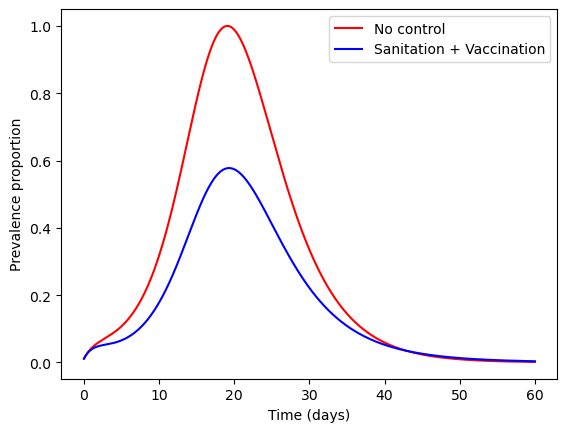

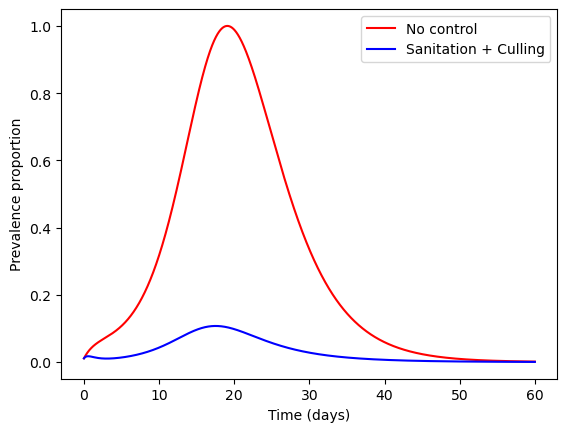

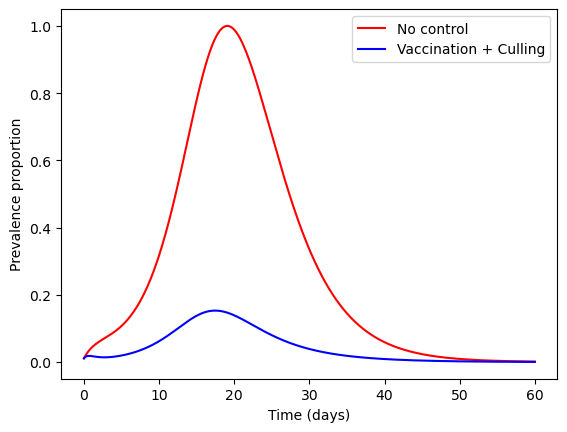

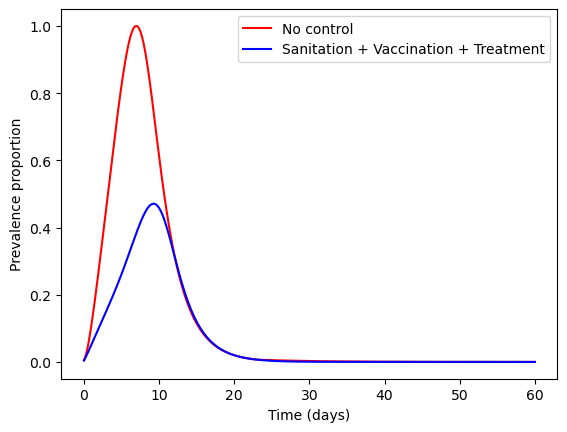

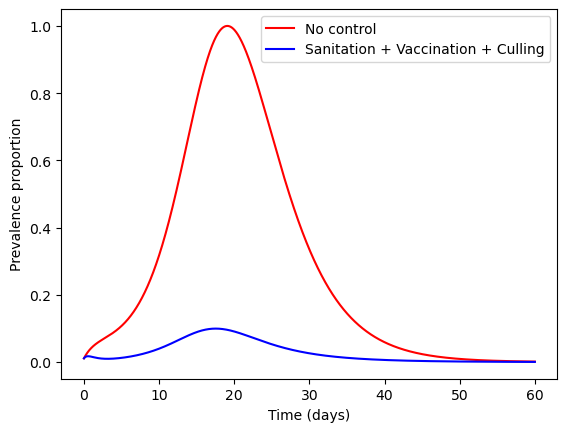

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------
# Parameters and initials
# -------------------
base_params = np.array([
    0.47904262, 0.52667365, 0.29843227, 0.3, 0.48363958, 0.58989004,
    0.89636362, 0.003909, 0.04743887, 0.41485323, 0.5,        # gamma_h = 0.5
    0.10000007, 0.5, 0.09355426, 0.44140005, 0.51256543,
    0.45584532, 0.08131154, 0.04164164, 0.51946879, 0.4215323, 0.6045352,
    0.52446098, 0.038, 0.058, 0.11671679, 0.43197723
], dtype=float)

y0 = np.array([
    3.4e8, 0, 1e6, 1e5, 0,        # humans: Sh, Vh, Eh, Ih, Rh
    1e10, 0, 1e7, 1e6, 0,         # domestic: Sd, Vd, Ed, Id, Rd
    3e9, 1e7, 0                   # wild: Sw, Iw, Rw
], dtype=float)

Nh0 = np.sum(y0[0:5])   # initial human pop
Nd0 = np.sum(y0[5:10])  # initial poultry pop

# Indices
i_theta_h, i_omega_h, i_mu_h, i_alpha_h, i_alpha_hd, i_alpha_hw, i_tau_h, i_sigma_h, i_delta_h, i_psi_h, i_gamma_h = range(11)
i_theta_d, i_omega_d, i_mu_d, i_alpha_d, i_alpha_dw, i_tau_d, i_sigma_d, i_cE, i_cI, i_psi_d, i_gamma_d = range(11, 22)
i_theta_w, i_psi_w, i_sigma_w, i_mu_w, i_alpha_w = range(22, 27)

# -------------------
# Control parameters
# -------------------
eps1_h = 0.65
eps1_d = 0.35
eps1_w = 0.0

kappa_h = 0.30
kappa_d = 0.20

eta_h = 0.02
xi_h  = 0.20

chi_E = 0.60
chi_I = 1.24

# -------------------
# Model
# -------------------
def human_modell_rhs(y, params):
    Sh, Vh, Eh, Ih, Rh, Sd, Vd, Ed, Id, Rd, Sw, Iw, Rw = y
    (
        theta_h, omega_h, mu_h, alpha_h, alpha_hd, alpha_hw, tau_h, sigma_h, delta_h, psi_h, gamma_h,
        theta_d, omega_d, mu_d, alpha_d, alpha_dw, tau_d, sigma_d, c_E, c_I, psi_d, gamma_d,
        theta_w, psi_w, sigma_w, mu_w, alpha_w
    ) = params
    Nh = Sh + Vh + Eh + Ih + Rh
    Nd = Sd + Vd + Ed + Id + Rd
    Nw = Sw + Iw + Rw

    phi1 = ((alpha_h * Ih) + (alpha_hd * Id) + (alpha_hw * Iw)) / Nh
    phi2 = ((alpha_d * Id) + (alpha_dw * Iw)) / Nd
    phi3 = alpha_w * Iw / Nw

    dSh_dt = theta_h - (omega_h + mu_h + phi1) * Sh + psi_h * Vh
    dVh_dt = omega_h * Sh - (1 - gamma_h) * phi1 * Vh - mu_h * Vh - psi_h * Vh
    dEh_dt = phi1 * Sh + (1 - gamma_h) * phi1 * Vh - (tau_h + mu_h) * Eh
    dIh_dt = tau_h * Eh - (sigma_h + mu_h + delta_h) * Ih
    dRh_dt = sigma_h * Ih - mu_h * Rh

    dSd_dt = theta_d - (omega_d + mu_d + phi2) * Sd + psi_d * Vd
    dVd_dt = omega_d * Sd - (1 - gamma_d) * phi2 * Vd - mu_d * Vd - psi_d * Vd
    dEd_dt = phi2 * Sd + (1 - gamma_d) * phi2 * Vd - (tau_d + mu_d + c_E) * Ed
    dId_dt = tau_d * Ed - (sigma_d + mu_d + c_I) * Id
    dRd_dt = sigma_d * Id - mu_d * Rd

    dSw_dt = theta_w - phi3 * Sw - mu_w * Sw + psi_w * Rw
    dIw_dt = phi3 * Sw - (sigma_w + mu_w) * Iw
    dRw_dt = sigma_w * Iw - (mu_w + psi_w) * Rw

    return np.array([
        dSh_dt, dVh_dt, dEh_dt, dIh_dt, dRh_dt,
        dSd_dt, dVd_dt, dEd_dt, dId_dt, dRd_dt,
        dSw_dt, dIw_dt, dRw_dt
    ], dtype=float)

def apply_controls_to_params(params, u1, u2, u3, u4):
    p = params.copy()
    # sanitation
    p[i_alpha_h]  *= (1.0 - eps1_h * u1)
    p[i_alpha_hd] *= (1.0 - eps1_h * u1)
    p[i_alpha_hw] *= (1.0 - eps1_h * u1)
    p[i_alpha_d]  *= (1.0 - eps1_d * u1)
    p[i_alpha_dw] *= (1.0 - eps1_d * u1)
    p[i_alpha_w]  *= (1.0 - eps1_w * u1)
    # vaccination
    p[i_omega_h] += kappa_h * u2
    p[i_omega_d] += kappa_d * u2
    # treatment (humans)
    p[i_sigma_h] += eta_h * u3
    p[i_delta_h] *= (1.0 - xi_h * u3)
    # culling (domestic)
    p[i_cE] += chi_E * u4
    p[i_cI] += chi_I * u4
    return p

# -------------------
# Integrator
# -------------------
T, dt = 60.0, 0.01
#T, dt = 60.0, 0.05
t = np.arange(0, T + dt, dt)
nT = len(t)

def integrate(params, controls):
    X = np.zeros((nT, y0.size))
    X[0] = y0
    for k in range(nT - 1):
        u1, u2, u3, u4 = controls(t[k])
        p_eff = apply_controls_to_params(params, u1, u2, u3, u4)
        k1 = human_modell_rhs(X[k], p_eff)
        k2 = human_modell_rhs(X[k] + 0.5*dt*k1, p_eff)
        k3 = human_modell_rhs(X[k] + 0.5*dt*k2, p_eff)
        k4 = human_modell_rhs(X[k] + dt*k3, p_eff)
        X[k+1] = X[k] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        X[k+1] = np.maximum(X[k+1], 0.0)
    return X

# -------------------
# Controls
# -------------------
def u_none(_):   return (0,0,0,0)
def u_u1(_):     return (1,0,0,0)
def u_u2(_):     return (0,1,0,0)
def u_u3(_):     return (0,0,1,0)
def u_u4(_):     return (0,0,0,1)
def u_u1u2(_):   return (1,1,0,0)
def u_u1u3(_):   return (1,0,1,0)
def u_u2u3(_):   return (0,1,1,0)
def u_u1u4(_):   return (1,0,0,1)
def u_u2u4(_):   return (0,1,0,1)
def u_u1u2u3(_): return (1,1,1,0)
def u_u1u2u4(_): return (1,1,0,1)

# -------------------
# Run simulations
# -------------------
sims = {
    "none": integrate(base_params, u_none),
    "u1": integrate(base_params, u_u1),
    "u2": integrate(base_params, u_u2),
    "u3": integrate(base_params, u_u3),
    "u4": integrate(base_params, u_u4),
    "u1+u2": integrate(base_params, u_u1u2),
    "u1+u3": integrate(base_params, u_u1u3),
    "u2+u3": integrate(base_params, u_u2u3),
    "u1+u4": integrate(base_params, u_u1u4),
    "u2+u4": integrate(base_params, u_u2u4),
    "u1+u2+u3": integrate(base_params, u_u1u2u3),
    "u1+u2+u4": integrate(base_params, u_u1u2u4),
}

# -------------------
# Helpers
# -------------------
def Ih_series(X): return X[:,3]
def Id_series(X): return X[:,8]

def cumulative_infections(I_series):
    return np.cumsum(I_series) * dt

def auc(y): return float(np.trapz(y, t))
def peak(y): return float(np.max(y))

# -------------------
# Metrics
# -------------------
# -------------------
# Metrics (normalized relative to no control)
# -------------------
rows = []
base_Ih = Ih_series(sims["none"])
base_Id = Id_series(sims["none"])
base_auc_h = np.trapz(base_Ih, t)
base_auc_d = np.trapz(base_Id, t)
base_peak_h = np.max(base_Ih)
base_peak_d = np.max(base_Id)

for name, X in sims.items():
    Ih, Id = Ih_series(X), Id_series(X)
    auc_h = np.trapz(Ih, t)
    auc_d = np.trapz(Id, t)
    peak_h = np.max(Ih)
    peak_d = np.max(Id)
    rows.append({
        "scenario": name,
        "Peak_Ih (rel)": peak_h/base_peak_h,
        "AUC_Ih (rel)": auc_h/base_auc_h,
        "Peak_Id (rel)": peak_d/base_peak_d,
        "AUC_Id (rel)": auc_d/base_auc_d,
    })

df = pd.DataFrame(rows).set_index("scenario").sort_index()
print("\nNormalized AUC and Peak values (relative to no control = 1.0):")
print(df.round(3))

# Mapping from code to descriptive control names
control_labels = {
    "u1": "Sanitation",
    "u2": "Vaccination",
    "u3": "Treatment",
    "u4": "Culling",
    "u1+u2": "Sanitation + Vaccination",
    "u1+u3": "Sanitation + Treatment",
    "u2+u3": "Vaccination + Treatment",
    "u1+u4": "Sanitation + Culling",
    "u2+u4": "Vaccination + Culling",
    "u1+u2+u3": "Sanitation + Vaccination + Treatment",
    "u1+u2+u4": "Sanitation + Vaccination + Culling"
}

# -------------------
# PLOTS
# -------------------
def plot_comparison(kind, series_func, group, label, N0):
    for key in group:
        plt.figure()
        base = series_func(sims["none"])
        ctrl = series_func(sims[key])
        base_max = np.max(base)

        # prevalence
        cum_base = np.cumsum(base)*dt
        cum_ctrl = np.cumsum(ctrl)*dt
        cum_max = np.max(cum_base)
        plt.plot(t, base/base_max, 'r', label="No control")
        plt.plot(t, ctrl/base_max, 'b', label=control_labels.get(key, key))
        plt.xlabel("Time (days)")
        plt.ylabel("Prevalence proportion")
        plt.legend()
        # Create a filename automatically
        filename = f"{key}_{kind}_{label.replace(' ', '_')}.png"

        # Save the figure
        #plt.savefig(filename, dpi=300, bbox_inches="tight")
        plt.show()

# 1) Single controls
plot_comparison("human", Ih_series, ["u1","u2","u3"], "Humans Ih", Nh0)
plot_comparison("poultry", Id_series, ["u1","u2","u4"], "Poultry Id", Nd0)

# 2) Double controls
plot_comparison("human", Ih_series, ["u1+u2","u1+u3","u2+u3"], "Humans Ih", Nh0)
plot_comparison("poultry", Id_series, ["u1+u2","u1+u4","u2+u4"], "Poultry Id", Nd0)

# 3) All controls
plot_comparison("human", Ih_series, ["u1+u2+u3"], "Humans Ih", Nh0)
plot_comparison("poultry", Id_series, ["u1+u2+u4"], "Poultry Id", Nd0)


# Cumulative

# Proportion in percentage